In [54]:
# Importación de librerias
import requests
import json
import pandas as pd
from pandas.io.json import json_normalize
from bs4 import BeautifulSoup
import re

# Web Scrapping

In [16]:
url='https://en.wikipedia.org/wiki/List_of_Super_Bowl_champions'

In [17]:
resp=requests.get(url)

In [18]:
resp.status_code

200

In [19]:
# La información esta en cadena de texto
html=resp.text
html

'<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>List of Super Bowl champions - Wikipedia</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"315707f7-f1aa-4afa-ade3-1fd018570df2","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_Super_Bowl_champions","wgTitle":"List of Super Bowl champions","wgCurRevisionId":1015905382,"wgRevisionId":1015905382,"wgArticleId":2145410,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Wikipedia indefinitely semi-protected pages","Articles with short description","Short description is different from 

In [20]:
# Convertir a objeto
soup=BeautifulSoup(html,'html.parser')

In [21]:
soup

<!DOCTYPE html>

<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of Super Bowl champions - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"315707f7-f1aa-4afa-ade3-1fd018570df2","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_Super_Bowl_champions","wgTitle":"List of Super Bowl champions","wgCurRevisionId":1015905382,"wgRevisionId":1015905382,"wgArticleId":2145410,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Wikipedia indefinitely semi-protected pages","Articles with short description","Short description is different from Wikid

In [22]:
type(soup)

bs4.BeautifulSoup

In [154]:
# Filtramos todas aquellas etiquetas correspondientes a elementos de la tabla, nos devuelve un array
table = soup.findAll('table', class_="wikitable sortable")

table

[<table class="wikitable sortable">
 <caption>Super Bowl championships
 </caption>
 <tbody><tr>
 <th>Game
 </th>
 <th>Date/<wbr/>Season
 </th>
 <th>Winning team
 </th>
 <th>Score
 </th>
 <th>Losing team
 </th>
 <th>Venue
 </th>
 <th>City
 </th>
 <th>Attendance
 </th>
 <th>Referee
 </th>
 <th class="unsortable">Ref
 </th></tr>
 <tr>
 <td style="text-align: center;"><span data-sort-value="01 !"><a href="/wiki/Super_Bowl_I" title="Super Bowl I">I</a><br/><sup class="reference" id="cite_ref-WCGs_6-0"><a href="#cite_note-WCGs-6">[sb 1]</a></sup></span>
 </td>
 <td><span data-sort-value="000000001967-01-15-0000" style="white-space:nowrap">January 15, 1967</span> (<a href="/wiki/1966_American_Football_League_season" title="1966 American Football League season">1966 AFL</a>/<a href="/wiki/1966_NFL_season" title="1966 NFL season">1966 NFL</a>)
 </td>
 <td style="background:#d0e7ff;"><span data-sort-value="Green Bay Packers 01 !"><a href="/wiki/1966_Green_Bay_Packers_season" title="1966 Green Ba

In [82]:
type(table)

bs4.element.ResultSet

In [155]:
table_sb = pd.read_html(str(table))
table_sb

[         Game                           Date/Season  \
 0     I[sb 1]  January 15, 1967 (1966 AFL/1966 NFL)   
 1    II[sb 1]  January 14, 1968 (1967 AFL/1967 NFL)   
 2   III[sb 1]  January 12, 1969 (1968 AFL/1968 NFL)   
 3    IV[sb 1]  January 11, 1970 (1969 AFL/1969 NFL)   
 4           V               January 17, 1971 (1970)   
 5          VI               January 16, 1972 (1971)   
 6         VII               January 14, 1973 (1972)   
 7        VIII               January 13, 1974 (1973)   
 8          IX               January 12, 1975 (1974)   
 9           X               January 18, 1976 (1975)   
 10         XI                January 9, 1977 (1976)   
 11        XII               January 15, 1978 (1977)   
 12       XIII               January 21, 1979 (1978)   
 13        XIV               January 20, 1980 (1979)   
 14         XV               January 25, 1981 (1980)   
 15        XVI               January 24, 1982 (1981)   
 16       XVII               January 30, 1983 (1

In [156]:
df_sb_ws=table_sb[0]
df_sb_ws

,Game,Date/Season,Winning team,Score,Losing team,Venue,City,Attendance,Referee,Ref
0,I[sb 1],"January 15, 1967 (1966 AFL/1966 NFL)","Green Bay Packersn(1, 1–0)",35–10,"Kansas City Chiefsa(1, 0–1)",Los Angeles Memorial Coliseum,"Los Angeles, California[sb 2]",61946,Norm Schachter,[7][8]
1,II[sb 1],"January 14, 1968 (1967 AFL/1967 NFL)","Green Bay Packersn(2, 2–0)",33–14,"Oakland Raidersa(1, 0–1)",Miami Orange Bowl,"Miami, Florida[sb 3]",75546,Jack Vest,[9][8]
2,III[sb 1],"January 12, 1969 (1968 AFL/1968 NFL)","New York Jetsa(1, 1–0)",16–7,"Baltimore Coltsn(1, 0–1)",Miami Orange Bowl (2),"Miami, Florida (2)[sb 3]",75389,Tom Bell,[10][8]
3,IV[sb 1],"January 11, 1970 (1969 AFL/1969 NFL)","Kansas City Chiefsa(2, 1–1)",23–7,"Minnesota Vikingsn(1, 0–1)",Tulane Stadium,"New Orleans, Louisiana",80562,John McDonough,[11][8]
4,V,"January 17, 1971 (1970)","Baltimore ColtsA(2, 1–1)",16–13,"Dallas CowboysN(1, 0–1)",Miami Orange Bowl (3),"Miami, Florida (3)[sb 3]",79204,Norm Schachter,[12][8]
5,VI,"January 16, 1972 (1971)","Dallas CowboysN(2, 1–1)",24–3,"Miami DolphinsA(1, 0–1)",Tulane Stadium (2),"New Orleans, Louisiana (2)",81023,Jim Tunney,[13][8]
6,VII,"January 14, 1973 (1972)","Miami DolphinsA(2, 1–1)",14–7,"Washington RedskinsN(1, 0–1)",Los Angeles Memorial Coliseum (2),"Los Angeles, California (2)[sb 2]",90182,Tom Bell,[14][8]
7,VIII,"January 13, 1974 (1973)","Miami DolphinsA(3, 2–1)",24–7,"Minnesota VikingsN(2, 0–2)",Rice Stadium[sb 4],"Houston, Texas",71882,Ben Dreith,[15][8]
8,IX,"January 12, 1975 (1974)","Pittsburgh SteelersA(1, 1–0)",16–6,"Minnesota VikingsN(3, 0–3)",Tulane Stadium (3),"New Orleans, Louisiana (3)",80997,Bernie Ulman,[16][8]
9,X,"January 18, 1976 (1975)","Pittsburgh SteelersA(2, 2–0)",21–17,"Dallas CowboysN(3, 1–2)",Miami Orange Bowl (4),"Miami, Florida (4)[sb 3]",80187,Norm Schachter,[17][8]


In [157]:
df_sb_ws.drop(['Game','Ref'],axis=1,inplace=True)

In [158]:
df_sb_ws

,Date/Season,Winning team,Score,Losing team,Venue,City,Attendance,Referee
0,"January 15, 1967 (1966 AFL/1966 NFL)","Green Bay Packersn(1, 1–0)",35–10,"Kansas City Chiefsa(1, 0–1)",Los Angeles Memorial Coliseum,"Los Angeles, California[sb 2]",61946,Norm Schachter
1,"January 14, 1968 (1967 AFL/1967 NFL)","Green Bay Packersn(2, 2–0)",33–14,"Oakland Raidersa(1, 0–1)",Miami Orange Bowl,"Miami, Florida[sb 3]",75546,Jack Vest
2,"January 12, 1969 (1968 AFL/1968 NFL)","New York Jetsa(1, 1–0)",16–7,"Baltimore Coltsn(1, 0–1)",Miami Orange Bowl (2),"Miami, Florida (2)[sb 3]",75389,Tom Bell
3,"January 11, 1970 (1969 AFL/1969 NFL)","Kansas City Chiefsa(2, 1–1)",23–7,"Minnesota Vikingsn(1, 0–1)",Tulane Stadium,"New Orleans, Louisiana",80562,John McDonough
4,"January 17, 1971 (1970)","Baltimore ColtsA(2, 1–1)",16–13,"Dallas CowboysN(1, 0–1)",Miami Orange Bowl (3),"Miami, Florida (3)[sb 3]",79204,Norm Schachter
5,"January 16, 1972 (1971)","Dallas CowboysN(2, 1–1)",24–3,"Miami DolphinsA(1, 0–1)",Tulane Stadium (2),"New Orleans, Louisiana (2)",81023,Jim Tunney
6,"January 14, 1973 (1972)","Miami DolphinsA(2, 1–1)",14–7,"Washington RedskinsN(1, 0–1)",Los Angeles Memorial Coliseum (2),"Los Angeles, California (2)[sb 2]",90182,Tom Bell
7,"January 13, 1974 (1973)","Miami DolphinsA(3, 2–1)",24–7,"Minnesota VikingsN(2, 0–2)",Rice Stadium[sb 4],"Houston, Texas",71882,Ben Dreith
8,"January 12, 1975 (1974)","Pittsburgh SteelersA(1, 1–0)",16–6,"Minnesota VikingsN(3, 0–3)",Tulane Stadium (3),"New Orleans, Louisiana (3)",80997,Bernie Ulman
9,"January 18, 1976 (1975)","Pittsburgh SteelersA(2, 2–0)",21–17,"Dallas CowboysN(3, 1–2)",Miami Orange Bowl (4),"Miami, Florida (4)[sb 3]",80187,Norm Schachter


In [159]:
# Eliminamos filas correspondientes a futuras SB que no disponen de resultado a día de hoy
df_sb_ws.drop([55,56,57,58,59],axis=0,inplace=True)
df_sb_ws

,Date/Season,Winning team,Score,Losing team,Venue,City,Attendance,Referee
0,"January 15, 1967 (1966 AFL/1966 NFL)","Green Bay Packersn(1, 1–0)",35–10,"Kansas City Chiefsa(1, 0–1)",Los Angeles Memorial Coliseum,"Los Angeles, California[sb 2]",61946,Norm Schachter
1,"January 14, 1968 (1967 AFL/1967 NFL)","Green Bay Packersn(2, 2–0)",33–14,"Oakland Raidersa(1, 0–1)",Miami Orange Bowl,"Miami, Florida[sb 3]",75546,Jack Vest
2,"January 12, 1969 (1968 AFL/1968 NFL)","New York Jetsa(1, 1–0)",16–7,"Baltimore Coltsn(1, 0–1)",Miami Orange Bowl (2),"Miami, Florida (2)[sb 3]",75389,Tom Bell
3,"January 11, 1970 (1969 AFL/1969 NFL)","Kansas City Chiefsa(2, 1–1)",23–7,"Minnesota Vikingsn(1, 0–1)",Tulane Stadium,"New Orleans, Louisiana",80562,John McDonough
4,"January 17, 1971 (1970)","Baltimore ColtsA(2, 1–1)",16–13,"Dallas CowboysN(1, 0–1)",Miami Orange Bowl (3),"Miami, Florida (3)[sb 3]",79204,Norm Schachter
5,"January 16, 1972 (1971)","Dallas CowboysN(2, 1–1)",24–3,"Miami DolphinsA(1, 0–1)",Tulane Stadium (2),"New Orleans, Louisiana (2)",81023,Jim Tunney
6,"January 14, 1973 (1972)","Miami DolphinsA(2, 1–1)",14–7,"Washington RedskinsN(1, 0–1)",Los Angeles Memorial Coliseum (2),"Los Angeles, California (2)[sb 2]",90182,Tom Bell
7,"January 13, 1974 (1973)","Miami DolphinsA(3, 2–1)",24–7,"Minnesota VikingsN(2, 0–2)",Rice Stadium[sb 4],"Houston, Texas",71882,Ben Dreith
8,"January 12, 1975 (1974)","Pittsburgh SteelersA(1, 1–0)",16–6,"Minnesota VikingsN(3, 0–3)",Tulane Stadium (3),"New Orleans, Louisiana (3)",80997,Bernie Ulman
9,"January 18, 1976 (1975)","Pittsburgh SteelersA(2, 2–0)",21–17,"Dallas CowboysN(3, 1–2)",Miami Orange Bowl (4),"Miami, Florida (4)[sb 3]",80187,Norm Schachter


In [160]:
df_sb_ws["Winning team"]=df_sb_ws["Winning team"].str.findall("\S[a-zA-Z]\w*").str.join(' ')

In [161]:
df_sb_ws["Losing team"]=df_sb_ws["Losing team"].str.findall("\S[a-zA-Z]\w*").str.join(' ')

In [162]:
df_sb_ws["Date/Season"]=df_sb_ws["Date/Season"].str.findall("\s\d{4}").str.join(' ')

In [211]:
df_sb_ws

,Date/Season,Winning team,Score,Losing team,Venue,City,Attendance,Referee
0,1967,Green Bay Packersn,35–10,Kansas City Chiefsa,Los Angeles Memorial Coliseum,"Los Angeles, California[sb 2]",61946,Norm Schachter
1,1968,Green Bay Packersn,33–14,Oakland Raidersa,Miami Orange Bowl,"Miami, Florida[sb 3]",75546,Jack Vest
2,1969,New York Jetsa,16–7,Baltimore Coltsn,Miami Orange Bowl (2),"Miami, Florida (2)[sb 3]",75389,Tom Bell
3,1970,Kansas City Chiefsa,23–7,Minnesota Vikingsn,Tulane Stadium,"New Orleans, Louisiana",80562,John McDonough
4,1971,Baltimore ColtsA,16–13,Dallas CowboysN,Miami Orange Bowl (3),"Miami, Florida (3)[sb 3]",79204,Norm Schachter
5,1972,Dallas CowboysN,24–3,Miami DolphinsA,Tulane Stadium (2),"New Orleans, Louisiana (2)",81023,Jim Tunney
6,1973,Miami DolphinsA,14–7,Washington RedskinsN,Los Angeles Memorial Coliseum (2),"Los Angeles, California (2)[sb 2]",90182,Tom Bell
7,1974,Miami DolphinsA,24–7,Minnesota VikingsN,Rice Stadium[sb 4],"Houston, Texas",71882,Ben Dreith
8,1975,Pittsburgh SteelersA,16–6,Minnesota VikingsN,Tulane Stadium (3),"New Orleans, Louisiana (3)",80997,Bernie Ulman
9,1976,Pittsburgh SteelersA,21–17,Dallas CowboysN,Miami Orange Bowl (4),"Miami, Florida (4)[sb 3]",80187,Norm Schachter


In [231]:
# Losing team
df_sb_ws['Losing team'].replace({'New England PatriotsA':'New England Patriots'},inplace=True)
df_sb_ws['Losing team'].replace({'Pittsburgh SteelersA':'Pittsburgh Steelers'},inplace=True)
df_sb_ws['Losing team'].replace({'Dallas CowboysN':'Dallas Cowboys'},inplace=True)
df_sb_ws['Losing team'].replace({'San Francisco 9ersN':'San Francisco 9ers'},inplace=True)
df_sb_ws['Losing team'].replace({'New York GiantsN':'New York Giants'},inplace=True)
df_sb_ws['Losing team'].replace({'Washington RedskinsN':'Washington Redskins'},inplace=True)
df_sb_ws['Losing team'].replace({'Denver BroncosA':'Denver Broncos'},inplace=True)
df_sb_ws['Losing team'].replace({'Oakland RaidersA':'Oakland Raiders'},inplace=True)
df_sb_ws['Losing team'].replace({'Green Bay Packersn':'Green Bay Packers'},inplace=True)
df_sb_ws['Losing team'].replace({'Los Angeles RaidersA':'Los Angeles Raiders'},inplace=True)
df_sb_ws['Losing team'].replace({'Chicago BearsN':'Chicago Bears'},inplace=True)
df_sb_ws['Losing team'].replace({'Philadelphia EaglesN':'Philadelphia Eagles'},inplace=True)
df_sb_ws['Losing team'].replace({'St Louis RamsN':'St Louis Rams'},inplace=True)
df_sb_ws['Losing team'].replace({'Seattle SeahawksN':'Seattle Seahawks'},inplace=True)
df_sb_ws['Losing team'].replace({'New Orleans SaintsN':'New Orleans Saints'},inplace=True)
df_sb_ws['Losing team'].replace({'Baltimore ColtsA':'Baltimore Colts'},inplace=True)
df_sb_ws['Losing team'].replace({'New York Jetsa':'New York Jets'},inplace=True)
df_sb_ws['Losing team'].replace({'Kansas City Chiefsa':'Kansas City Chiefs'},inplace=True)
df_sb_ws['Losing team'].replace({'Kansas City ChiefsA':'Kansas City Chiefs'},inplace=True)
df_sb_ws['Losing team'].replace({'Indianapolis ColtsA':'Indianapolis Colts'},inplace=True)
df_sb_ws['Losing team'].replace({'Minnesota Vikingsn':'Minnesota Vikings'},inplace=True)
df_sb_ws['Losing team'].replace({'Minnesota VikingsN':'Minnesota Vikings'},inplace=True)
df_sb_ws['Losing team'].replace({'Miami DolphinsA':'Miami Dolphins'},inplace=True)
df_sb_ws['Losing team'].replace({'Green Bay PackersN':'Green Bay Packers'},inplace=True)
df_sb_ws['Losing team'].replace({'Tampa Bay BuccaneersN':'Tampa Bay Buccaneers'},inplace=True)
df_sb_ws['Losing team'].replace({'Los Angeles RamsN':'Los Angeles Rams'},inplace=True)
df_sb_ws['Losing team'].replace({'Oakland Raidersa':'Oakland Raiders'},inplace=True)
df_sb_ws['Losing team'].replace({'Baltimore Coltsn':'Baltimore Colts'},inplace=True)
df_sb_ws['Losing team'].replace({'Cincinnati BengalsA':'Cincinnati Bengals'},inplace=True)
df_sb_ws['Losing team'].replace({'Buffalo BillsA':'Buffalo Bills'},inplace=True)
df_sb_ws['Losing team'].replace({'Atlanta FalconsN':'Atlanta Falcons'},inplace=True)
df_sb_ws['Losing team'].replace({'San Diego ChargersA':'San Diego Chargers'},inplace=True)
df_sb_ws['Losing team'].replace({'Tennessee TitansA':'Tennessee Titans'},inplace=True)
df_sb_ws['Losing team'].replace({'Carolina PanthersN':'Carolina Panthers'},inplace=True)
df_sb_ws['Losing team'].replace({'Arizona CardinalsN':'Arizona Cardinals'},inplace=True)

# Winning team

df_sb_ws['Winning team'].replace({'New England PatriotsA':'New England Patriots'},inplace=True)
df_sb_ws['Winning team'].replace({'Pittsburgh SteelersA':'Pittsburgh Steelers'},inplace=True)
df_sb_ws['Winning team'].replace({'Dallas CowboysN':'Dallas Cowboys'},inplace=True)
df_sb_ws['Winning team'].replace({'San Francisco 9ersN':'San Francisco 9ers'},inplace=True)
df_sb_ws['Winning team'].replace({'New York GiantsN':'New York Giants'},inplace=True)
df_sb_ws['Winning team'].replace({'Washington RedskinsN':'Washington Redskins'},inplace=True)
df_sb_ws['Winning team'].replace({'Denver BroncosA':'Denver Broncos'},inplace=True)
df_sb_ws['Winning team'].replace({'Oakland RaidersA':'Oakland Raiders'},inplace=True)
df_sb_ws['Winning team'].replace({'Green Bay Packersn':'Green Bay Packers'},inplace=True)
df_sb_ws['Winning team'].replace({'Los Angeles RaidersA':'Los Angeles Raiders'},inplace=True)
df_sb_ws['Winning team'].replace({'Chicago BearsN':'Chicago Bears'},inplace=True)
df_sb_ws['Winning team'].replace({'Philadelphia EaglesN':'Philadelphia Eagles'},inplace=True)
df_sb_ws['Winning team'].replace({'St Louis RamsN':'St Louis Rams'},inplace=True)
df_sb_ws['Winning team'].replace({'Seattle SeahawksN':'Seattle Seahawks'},inplace=True)
df_sb_ws['Winning team'].replace({'New Orleans SaintsN':'New Orleans Saints'},inplace=True)
df_sb_ws['Winning team'].replace({'Baltimore ColtsA':'Baltimore Colts'},inplace=True)
df_sb_ws['Winning team'].replace({'New York Jetsa':'New York Jets'},inplace=True)
df_sb_ws['Winning team'].replace({'Kansas City Chiefsa':'Kansas City Chiefs'},inplace=True)
df_sb_ws['Winning team'].replace({'Kansas City ChiefsA':'Kansas City Chiefs'},inplace=True)
df_sb_ws['Winning team'].replace({'Indianapolis ColtsA':'Indianapolis Colts'},inplace=True)
df_sb_ws['Winning team'].replace({'Minnesota Vikingsn':'Minnesota Vikings'},inplace=True)
df_sb_ws['Winning team'].replace({'Minnesota VikingsN':'Minnesota Vikings'},inplace=True)
df_sb_ws['Winning team'].replace({'Miami DolphinsA':'Miami Dolphins'},inplace=True)
df_sb_ws['Winning team'].replace({'Green Bay PackersN':'Green Bay Packers'},inplace=True)
df_sb_ws['Winning team'].replace({'Tampa Bay BuccaneersN':'Tampa Bay Buccaneers'},inplace=True)



df_sb_ws

,Date/Season,Winning team,Score,Losing team,Venue,City,Attendance,Referee
0,1967,Green Bay Packers,35–10,Kansas City Chiefs,Los Angeles Memorial Coliseum,"Los Angeles, California[sb 2]",61946,Norm Schachter
1,1968,Green Bay Packers,33–14,Oakland Raiders,Miami Orange Bowl,"Miami, Florida[sb 3]",75546,Jack Vest
2,1969,New York Jets,16–7,Baltimore Colts,Miami Orange Bowl (2),"Miami, Florida (2)[sb 3]",75389,Tom Bell
3,1970,Kansas City Chiefs,23–7,Minnesota Vikings,Tulane Stadium,"New Orleans, Louisiana",80562,John McDonough
4,1971,Baltimore Colts,16–13,Dallas Cowboys,Miami Orange Bowl (3),"Miami, Florida (3)[sb 3]",79204,Norm Schachter
5,1972,Dallas Cowboys,24–3,Miami Dolphins,Tulane Stadium (2),"New Orleans, Louisiana (2)",81023,Jim Tunney
6,1973,Miami Dolphins,14–7,Washington Redskins,Los Angeles Memorial Coliseum (2),"Los Angeles, California (2)[sb 2]",90182,Tom Bell
7,1974,Miami Dolphins,24–7,Minnesota Vikings,Rice Stadium[sb 4],"Houston, Texas",71882,Ben Dreith
8,1975,Pittsburgh Steelers,16–6,Minnesota Vikings,Tulane Stadium (3),"New Orleans, Louisiana (3)",80997,Bernie Ulman
9,1976,Pittsburgh Steelers,21–17,Dallas Cowboys,Miami Orange Bowl (4),"Miami, Florida (4)[sb 3]",80187,Norm Schachter


In [234]:
df_sb_ws["City"]=df_sb_ws["City"].str.findall("^[a-zA-Z ]*").str.join(' ')
df_sb_ws["Venue"]=df_sb_ws["Venue"].str.findall("^[a-zA-Z ]*").str.join(' ')
df_sb_ws


,Date/Season,Winning team,Score,Losing team,Venue,City,Attendance,Referee
0,1967,Green Bay Packers,35–10,Kansas City Chiefs,Los Angeles Memorial Coliseum,Los Angeles,61946,Norm Schachter
1,1968,Green Bay Packers,33–14,Oakland Raiders,Miami Orange Bowl,Miami,75546,Jack Vest
2,1969,New York Jets,16–7,Baltimore Colts,Miami Orange Bowl,Miami,75389,Tom Bell
3,1970,Kansas City Chiefs,23–7,Minnesota Vikings,Tulane Stadium,New Orleans,80562,John McDonough
4,1971,Baltimore Colts,16–13,Dallas Cowboys,Miami Orange Bowl,Miami,79204,Norm Schachter
5,1972,Dallas Cowboys,24–3,Miami Dolphins,Tulane Stadium,New Orleans,81023,Jim Tunney
6,1973,Miami Dolphins,14–7,Washington Redskins,Los Angeles Memorial Coliseum,Los Angeles,90182,Tom Bell
7,1974,Miami Dolphins,24–7,Minnesota Vikings,Rice Stadium,Houston,71882,Ben Dreith
8,1975,Pittsburgh Steelers,16–6,Minnesota Vikings,Tulane Stadium,New Orleans,80997,Bernie Ulman
9,1976,Pittsburgh Steelers,21–17,Dallas Cowboys,Miami Orange Bowl,Miami,80187,Norm Schachter


In [239]:
df_sb_ws.rename(columns={'Venue':'Stadium','Date/Season':'Year'},inplace=True)
df_sb_ws

,Year,Winning team,Score,Losing team,Stadium,City,Attendance,Referee
0,1967,Green Bay Packers,35–10,Kansas City Chiefs,Los Angeles Memorial Coliseum,Los Angeles,61946,Norm Schachter
1,1968,Green Bay Packers,33–14,Oakland Raiders,Miami Orange Bowl,Miami,75546,Jack Vest
2,1969,New York Jets,16–7,Baltimore Colts,Miami Orange Bowl,Miami,75389,Tom Bell
3,1970,Kansas City Chiefs,23–7,Minnesota Vikings,Tulane Stadium,New Orleans,80562,John McDonough
4,1971,Baltimore Colts,16–13,Dallas Cowboys,Miami Orange Bowl,Miami,79204,Norm Schachter
5,1972,Dallas Cowboys,24–3,Miami Dolphins,Tulane Stadium,New Orleans,81023,Jim Tunney
6,1973,Miami Dolphins,14–7,Washington Redskins,Los Angeles Memorial Coliseum,Los Angeles,90182,Tom Bell
7,1974,Miami Dolphins,24–7,Minnesota Vikings,Rice Stadium,Houston,71882,Ben Dreith
8,1975,Pittsburgh Steelers,16–6,Minnesota Vikings,Tulane Stadium,New Orleans,80997,Bernie Ulman
9,1976,Pittsburgh Steelers,21–17,Dallas Cowboys,Miami Orange Bowl,Miami,80187,Norm Schachter


In [249]:
df_sb_ws=df_sb_ws[['Year','Winning team','Score','Losing team','Stadium','City','Attendance','Referee']]
df_sb_ws.sort_values('Year',ascending=False)
df_sb_ws

,Year,Winning team,Score,Losing team,Stadium,City,Attendance,Referee
0,1967,Green Bay Packers,35–10,Kansas City Chiefs,Los Angeles Memorial Coliseum,Los Angeles,61946,Norm Schachter
1,1968,Green Bay Packers,33–14,Oakland Raiders,Miami Orange Bowl,Miami,75546,Jack Vest
2,1969,New York Jets,16–7,Baltimore Colts,Miami Orange Bowl,Miami,75389,Tom Bell
3,1970,Kansas City Chiefs,23–7,Minnesota Vikings,Tulane Stadium,New Orleans,80562,John McDonough
4,1971,Baltimore Colts,16–13,Dallas Cowboys,Miami Orange Bowl,Miami,79204,Norm Schachter
5,1972,Dallas Cowboys,24–3,Miami Dolphins,Tulane Stadium,New Orleans,81023,Jim Tunney
6,1973,Miami Dolphins,14–7,Washington Redskins,Los Angeles Memorial Coliseum,Los Angeles,90182,Tom Bell
7,1974,Miami Dolphins,24–7,Minnesota Vikings,Rice Stadium,Houston,71882,Ben Dreith
8,1975,Pittsburgh Steelers,16–6,Minnesota Vikings,Tulane Stadium,New Orleans,80997,Bernie Ulman
9,1976,Pittsburgh Steelers,21–17,Dallas Cowboys,Miami Orange Bowl,Miami,80187,Norm Schachter


In [260]:
df_sb_ws.to_csv('df_sb_ws.csv')

# API

In [2]:
# Obtención de la dirección API
SB_api='https://public.opendatasoft.com/api/records/1.0/search/?dataset=super-bowl&q=&rows=54&sort=date&facet=winner&facet=qb_winner&facet=coach_winner&facet=loser&facet=qb_loser&facet=coach_loser&facet=city&facet=state'

In [3]:
headers={'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:86.0) Gecko/20100101 Firefox/86.0'}

In [4]:
resp=requests.get(SB_api,headers=headers)

In [5]:
# Estado del código satisfactorio
resp.status_code

200

In [6]:
content_json=resp.json()

In [7]:
content_json

{'nhits': 54,
 'parameters': {'dataset': 'super-bowl',
  'timezone': 'UTC',
  'rows': 54,
  'start': 0,
  'sort': ['date'],
  'format': 'json',
  'facet': ['winner',
   'qb_winner',
   'coach_winner',
   'loser',
   'qb_loser',
   'coach_loser',
   'city',
   'state']},
 'records': [{'datasetid': 'super-bowl',
   'recordid': 'e9fcb98a37dc2e37d19c9e04c107c1a2eac210a6',
   'fields': {'umpire': 'Barry Anderson',
    'coach_winner': 'Andy Reid',
    'qb_loser': 'Jimmy Garoppolo',
    'qb_winner': 'Patrick Mahomes',
    'geo_shape': {'type': 'Polygon',
     'coordinates': [[[-80.056539285, 26.88],
       [-80.088015, 26.205765],
       [-80.13156, 25.816775],
       [-80.38103, 25.20616],
       [-80.6797985501, 25.0799164902],
       [-81.1719132148, 25.2010977239],
       [-81.3301206123, 25.6397531194],
       [-81.7100715807, 25.869945787],
       [-82.2397808499, 26.7298416204],
       [-82.70515, 27.49504],
       [-82.85526, 27.88624],
       [-82.6498850166, 28.5501697861],
       [

In [181]:
# Devuelve una copia de la matriz colapsada en una dimensión.
flatten = pd.json_normalize(content_json)

flatten

,nhits,records,facet_groups,parameters.dataset,parameters.timezone,parameters.rows,parameters.start,parameters.sort,parameters.format,parameters.facet
0,54,"[{'datasetid': 'super-bowl', 'recordid': 'e9fc...","[{'facets': [{'count': 10, 'path': 'New Orlean...",super-bowl,UTC,54,0,[date],json,"[winner, qb_winner, coach_winner, loser, qb_lo..."


In [182]:

df_sb = pd.json_normalize(flatten.records[0])

df_sb

,datasetid,recordid,record_timestamp,fields.umpire,fields.coach_winner,fields.qb_loser,fields.qb_winner,fields.geo_shape.type,fields.geo_shape.coordinates,fields.head_linesman,...,fields.coach_loser,fields.date,fields.mvp,fields.losing_pts,fields.line_judge,fields.geo_point_2d,fields.loser,fields.sb,geometry.type,geometry.coordinates
0,super-bowl,e9fcb98a37dc2e37d19c9e04c107c1a2eac210a6,2020-02-04T14:34:15.218000+00:00,Barry Anderson,Andy Reid,Jimmy Garoppolo,Patrick Mahomes,Polygon,"[[[-80.056539285, 26.88], [-80.088015, 26.2057...",Kent Payne,...,Kyle Shanahan,2020-02-02,Patrick Mahomes,20,Carl Johnson,"[28.6169283051, -82.5025741003]",San Francisco 49ers,LIV,Point,"[-82.5025741003, 28.6169283051]"
1,super-bowl,1bf0b6076ac1e7ef73ba79f660dbfe75993be9ea,2020-02-04T14:34:15.218000+00:00,Fred Bryan,Bill Belichick,Jared Goff,Tom Brady,Polygon,"[[[-80.8650068835, 32.0331613226], [-81.33629,...",Ed Camp,...,Sean McVay,2019-02-03,Julian Edelman,3,Jeff Bergman,"[32.6524688988, -83.4510929921]",Los Angeles Rams,LIII,Point,"[-83.4510929921, 32.6524688988]"
2,super-bowl,cf77476939275e7c97ec9f08358e67a50e543296,2020-02-04T14:34:15.218000+00:00,Roy Ellison,Doug Pederson,Tom Brady,Nick Foles,Polygon,"[[[-89.5994091459, 48.0102739528], [-89.488884...",Jerry Bergman,...,Bill Belichick,2018-02-04,Nick Foles,33,Byron Boston,"[46.3600731634, -94.1774361191]",New England Patriots,LII,Point,"[-94.1774361191, 46.3600731634]"
3,super-bowl,3c045c7b1b3910d405084f8015263a9e2c84b2ad,2018-02-01T18:14:47.588000+00:00,Dan Ferrell,Bill Belichick,Matt Ryan,Tom Brady,Polygon,"[[[-93.5782360502, 31.2161310898], [-93.489843...",Kent Payne,...,Dan Quinn,2017-02-05,Tom Brady,28,Jeff Seeman,"[31.4555082562, -99.328675661]",Atlanta Falcons,LI,Point,"[-99.328675661, 31.4555082562]"
4,super-bowl,dbfd084f65cada849ac9f608557ecb60345856cc,2018-02-01T18:14:47.588000+00:00,Jeff Rice,Gary Kubiak,Cam Newton,Peyton Manning,Polygon,"[[[-114.3549006824, 34.464666653], [-114.16597...",Wayne Mackie,...,Ron Rivera,2016-02-07,Von Miller,10,Rusty Baynes,"[37.2551445335, -119.640543961]",Carolina Panthers,L,Point,"[-119.640543961, 37.2551445335]"
5,super-bowl,29ccf7ad7e9487db0350675a9d9a8a8b40a7a573,2018-02-01T18:14:47.588000+00:00,Bill Schuster,Bill Belichick,Russell Wilson,Tom Brady,Polygon,"[[[-109.0452247791, 36.9999124212], [-109.0436...",Dana McKenzie,...,Pete Carroll,2015-02-01,Tom Brady,24,Mark Perlman,"[34.2955950831, -111.659463463]",Seattle Seahawks,XLIX,Point,"[-111.659463463, 34.2955950831]"
6,super-bowl,00fe4e0d867871f7c0aa171681b8b112db2b0982,2018-02-01T18:14:47.588000+00:00,Carl Paganelli,Pete Carroll,Peyton Manning,Russell Wilson,Polygon,"[[[-73.9127955797, 40.9601874863], [-73.952325...",Jim Mello,...,John Fox,2014-02-02,Malcolm Smith,8,Tom Symonette,"[40.2057113452, -74.6705438062]",Denver Broncos,XLVIII,Point,"[-74.6705438062, 40.2057113452]"
7,super-bowl,3daaee8c64e7d497eab1c255721e5f965d28f1d9,2018-02-01T18:14:47.588000+00:00,Darrell Jenkins,John Harbaugh,Colin Kaepernick,Joe Flacco,Polygon,"[[[-89.21767, 29.29108], [-89.4083872139, 29.1...",Steve Stelljes,...,Jim Harbaugh,2013-02-03,Joe Flacco,31,Byron Boston,"[31.0480777894, -91.9572061819]",San Francisco 49ers,XLVII,Point,"[-91.9572061819, 31.0480777894]"
8,super-bowl,1c25692b224d38bcfb7eabbfc51165d56c946d94,2018-02-01T18:14:47.588000+00:00,Carl Paganelli,Tom Coughlin,Tom Brady,Eli Manning,Polygon,"[[[-84.8067559476, 41.6777405869], [-84.809934...",Tom Stabile,...,Bill Belichick,2012-02-05,Eli Manning,17,Gary Arthur,"[39.9127116677, -86.2848049993]",New England Patriots,XLVI,Point,"[-86.2848049993, 39.9127116677]"
9,super-bowl,8233b91530a052aed8c179079698aaacef73470c,2018-02-01T18:14:47.588000+00:00,Chad Brown,Mike McCarthy,Ben Roethlisberger,Aaron Rodgers,Polygon,"[[[-93.5782360502, 31.2161310898], [-93.489843...",Kent Payne,...,Mike Tomlin,2011-02-06,Aaron Rodgers,25,John Hussey,"[31.4555082562, -99.328675661]",Pittsburgh Steelers,XLV,Point,"[-99.328675661, 31.4555082562]"


In [183]:
pd.set_option("display.max_rows",None)
df_sb

,datasetid,recordid,record_timestamp,fields.umpire,fields.coach_winner,fields.qb_loser,fields.qb_winner,fields.geo_shape.type,fields.geo_shape.coordinates,fields.head_linesman,...,fields.coach_loser,fields.date,fields.mvp,fields.losing_pts,fields.line_judge,fields.geo_point_2d,fields.loser,fields.sb,geometry.type,geometry.coordinates
0,super-bowl,e9fcb98a37dc2e37d19c9e04c107c1a2eac210a6,2020-02-04T14:34:15.218000+00:00,Barry Anderson,Andy Reid,Jimmy Garoppolo,Patrick Mahomes,Polygon,"[[[-80.056539285, 26.88], [-80.088015, 26.2057...",Kent Payne,...,Kyle Shanahan,2020-02-02,Patrick Mahomes,20,Carl Johnson,"[28.6169283051, -82.5025741003]",San Francisco 49ers,LIV,Point,"[-82.5025741003, 28.6169283051]"
1,super-bowl,1bf0b6076ac1e7ef73ba79f660dbfe75993be9ea,2020-02-04T14:34:15.218000+00:00,Fred Bryan,Bill Belichick,Jared Goff,Tom Brady,Polygon,"[[[-80.8650068835, 32.0331613226], [-81.33629,...",Ed Camp,...,Sean McVay,2019-02-03,Julian Edelman,3,Jeff Bergman,"[32.6524688988, -83.4510929921]",Los Angeles Rams,LIII,Point,"[-83.4510929921, 32.6524688988]"
2,super-bowl,cf77476939275e7c97ec9f08358e67a50e543296,2020-02-04T14:34:15.218000+00:00,Roy Ellison,Doug Pederson,Tom Brady,Nick Foles,Polygon,"[[[-89.5994091459, 48.0102739528], [-89.488884...",Jerry Bergman,...,Bill Belichick,2018-02-04,Nick Foles,33,Byron Boston,"[46.3600731634, -94.1774361191]",New England Patriots,LII,Point,"[-94.1774361191, 46.3600731634]"
3,super-bowl,3c045c7b1b3910d405084f8015263a9e2c84b2ad,2018-02-01T18:14:47.588000+00:00,Dan Ferrell,Bill Belichick,Matt Ryan,Tom Brady,Polygon,"[[[-93.5782360502, 31.2161310898], [-93.489843...",Kent Payne,...,Dan Quinn,2017-02-05,Tom Brady,28,Jeff Seeman,"[31.4555082562, -99.328675661]",Atlanta Falcons,LI,Point,"[-99.328675661, 31.4555082562]"
4,super-bowl,dbfd084f65cada849ac9f608557ecb60345856cc,2018-02-01T18:14:47.588000+00:00,Jeff Rice,Gary Kubiak,Cam Newton,Peyton Manning,Polygon,"[[[-114.3549006824, 34.464666653], [-114.16597...",Wayne Mackie,...,Ron Rivera,2016-02-07,Von Miller,10,Rusty Baynes,"[37.2551445335, -119.640543961]",Carolina Panthers,L,Point,"[-119.640543961, 37.2551445335]"
5,super-bowl,29ccf7ad7e9487db0350675a9d9a8a8b40a7a573,2018-02-01T18:14:47.588000+00:00,Bill Schuster,Bill Belichick,Russell Wilson,Tom Brady,Polygon,"[[[-109.0452247791, 36.9999124212], [-109.0436...",Dana McKenzie,...,Pete Carroll,2015-02-01,Tom Brady,24,Mark Perlman,"[34.2955950831, -111.659463463]",Seattle Seahawks,XLIX,Point,"[-111.659463463, 34.2955950831]"
6,super-bowl,00fe4e0d867871f7c0aa171681b8b112db2b0982,2018-02-01T18:14:47.588000+00:00,Carl Paganelli,Pete Carroll,Peyton Manning,Russell Wilson,Polygon,"[[[-73.9127955797, 40.9601874863], [-73.952325...",Jim Mello,...,John Fox,2014-02-02,Malcolm Smith,8,Tom Symonette,"[40.2057113452, -74.6705438062]",Denver Broncos,XLVIII,Point,"[-74.6705438062, 40.2057113452]"
7,super-bowl,3daaee8c64e7d497eab1c255721e5f965d28f1d9,2018-02-01T18:14:47.588000+00:00,Darrell Jenkins,John Harbaugh,Colin Kaepernick,Joe Flacco,Polygon,"[[[-89.21767, 29.29108], [-89.4083872139, 29.1...",Steve Stelljes,...,Jim Harbaugh,2013-02-03,Joe Flacco,31,Byron Boston,"[31.0480777894, -91.9572061819]",San Francisco 49ers,XLVII,Point,"[-91.9572061819, 31.0480777894]"
8,super-bowl,1c25692b224d38bcfb7eabbfc51165d56c946d94,2018-02-01T18:14:47.588000+00:00,Carl Paganelli,Tom Coughlin,Tom Brady,Eli Manning,Polygon,"[[[-84.8067559476, 41.6777405869], [-84.809934...",Tom Stabile,...,Bill Belichick,2012-02-05,Eli Manning,17,Gary Arthur,"[39.9127116677, -86.2848049993]",New England Patriots,XLVI,Point,"[-86.2848049993, 39.9127116677]"
9,super-bowl,8233b91530a052aed8c179079698aaacef73470c,2018-02-01T18:14:47.588000+00:00,Chad Brown,Mike McCarthy,Ben Roethlisberger,Aaron Rodgers,Polygon,"[[[-93.5782360502, 31.2161310898], [-93.489843...",Kent Payne,...,Mike Tomlin,2011-02-06,Aaron Rodgers,25,John Hussey,"[31.4555082562, -99.328675661]",Pittsburgh Steelers,XLV,Point,"[-99.328675661, 31.4555082562]"


In [184]:
df_sb.drop(['datasetid','recordid','record_timestamp','fields.geo_shape.type','fields.geo_shape.coordinates','fields.geo_point_2d','geometry.type','fields.sb','geometry.coordinates'],axis=1,inplace=True)
df_sb

,fields.umpire,fields.coach_winner,fields.qb_loser,fields.qb_winner,fields.head_linesman,fields.city,fields.side_judge,fields.winner,fields.state,fields.back_judge,...,fields.referee,fields.winning_pts,fields.field_judge,fields.attendance,fields.coach_loser,fields.date,fields.mvp,fields.losing_pts,fields.line_judge,fields.loser
0,Barry Anderson,Andy Reid,Jimmy Garoppolo,Patrick Mahomes,Kent Payne,Miami Gardens,Boris Cheek,Kansas City Chiefs,Florida,Greg Steed,...,Bill Vinovich,31,Michael Banks,62417,Kyle Shanahan,2020-02-02,Patrick Mahomes,20,Carl Johnson,San Francisco 49ers
1,Fred Bryan,Bill Belichick,Jared Goff,Tom Brady,Ed Camp,Atlanta,Eugene Hall,New England Patriots,Georgia,Terrence Miles,...,John Parry,13,Steve Zimmer,70081,Sean McVay,2019-02-03,Julian Edelman,3,Jeff Bergman,Los Angeles Rams
2,Roy Ellison,Doug Pederson,Tom Brady,Nick Foles,Jerry Bergman,Minneapolis,Scott Edwards,Philadelphia Eagles,Minnesota,Perry Paganelli,...,Gene Steratore,41,Tom Hill,67612,Bill Belichick,2018-02-04,Nick Foles,33,Byron Boston,New England Patriots
3,Dan Ferrell,Bill Belichick,Matt Ryan,Tom Brady,Kent Payne,Houston,Dyrol Prioleau,New England Patriots,Texas,Todd Prukop,...,Carl Cheffers,34,Doug Rosenbaum,70807,Dan Quinn,2017-02-05,Tom Brady,28,Jeff Seeman,Atlanta Falcons
4,Jeff Rice,Gary Kubiak,Cam Newton,Peyton Manning,Wayne Mackie,Santa Clara,Scott Edwards,Denver Broncos,California,Keith Ferguson,...,Clete Blakeman,24,Boris Cheek,71088,Ron Rivera,2016-02-07,Von Miller,10,Rusty Baynes,Carolina Panthers
5,Bill Schuster,Bill Belichick,Russell Wilson,Tom Brady,Dana McKenzie,Glendale,Tom Hill,New England Patriots,Arizona,Terrence Miles,...,Bill Vinovich,28,Bob Waggoner,70288,Pete Carroll,2015-02-01,Tom Brady,24,Mark Perlman,Seattle Seahawks
6,Carl Paganelli,Pete Carroll,Peyton Manning,Russell Wilson,Jim Mello,East Rutherford,Dave Wyant,Seattle Seahawks,New Jersey,Steve Freeman,...,Terry McAulay,43,Scott Steenson,82529,John Fox,2014-02-02,Malcolm Smith,8,Tom Symonette,Denver Broncos
7,Darrell Jenkins,John Harbaugh,Colin Kaepernick,Joe Flacco,Steve Stelljes,New Orleans,Joe Larrew,Baltimore Ravens,Louisiana,Dino Paganelli,...,Jerome Boger,34,Craig Wrolstad,71024,Jim Harbaugh,2013-02-03,Joe Flacco,31,Byron Boston,San Francisco 49ers
8,Carl Paganelli,Tom Coughlin,Tom Brady,Eli Manning,Tom Stabile,Indianapolis,Laird Hayes,New York Giants,Indiana,Tony Steratore,...,John Parry,21,Gary Cavaletto,68658,Bill Belichick,2012-02-05,Eli Manning,17,Gary Arthur,New England Patriots
9,Chad Brown,Mike McCarthy,Ben Roethlisberger,Aaron Rodgers,Kent Payne,Arlington,Mike Weatherford,Green Bay Packers,Texas,Scott Helverson,...,Walt Anderson[5],31,Doug Rosenbaum,103219,Mike Tomlin,2011-02-06,Aaron Rodgers,25,John Hussey,Pittsburgh Steelers


In [185]:
df_sb.columns = map(str.title, df_sb.columns)
df_sb

,Fields.Umpire,Fields.Coach_Winner,Fields.Qb_Loser,Fields.Qb_Winner,Fields.Head_Linesman,Fields.City,Fields.Side_Judge,Fields.Winner,Fields.State,Fields.Back_Judge,...,Fields.Referee,Fields.Winning_Pts,Fields.Field_Judge,Fields.Attendance,Fields.Coach_Loser,Fields.Date,Fields.Mvp,Fields.Losing_Pts,Fields.Line_Judge,Fields.Loser
0,Barry Anderson,Andy Reid,Jimmy Garoppolo,Patrick Mahomes,Kent Payne,Miami Gardens,Boris Cheek,Kansas City Chiefs,Florida,Greg Steed,...,Bill Vinovich,31,Michael Banks,62417,Kyle Shanahan,2020-02-02,Patrick Mahomes,20,Carl Johnson,San Francisco 49ers
1,Fred Bryan,Bill Belichick,Jared Goff,Tom Brady,Ed Camp,Atlanta,Eugene Hall,New England Patriots,Georgia,Terrence Miles,...,John Parry,13,Steve Zimmer,70081,Sean McVay,2019-02-03,Julian Edelman,3,Jeff Bergman,Los Angeles Rams
2,Roy Ellison,Doug Pederson,Tom Brady,Nick Foles,Jerry Bergman,Minneapolis,Scott Edwards,Philadelphia Eagles,Minnesota,Perry Paganelli,...,Gene Steratore,41,Tom Hill,67612,Bill Belichick,2018-02-04,Nick Foles,33,Byron Boston,New England Patriots
3,Dan Ferrell,Bill Belichick,Matt Ryan,Tom Brady,Kent Payne,Houston,Dyrol Prioleau,New England Patriots,Texas,Todd Prukop,...,Carl Cheffers,34,Doug Rosenbaum,70807,Dan Quinn,2017-02-05,Tom Brady,28,Jeff Seeman,Atlanta Falcons
4,Jeff Rice,Gary Kubiak,Cam Newton,Peyton Manning,Wayne Mackie,Santa Clara,Scott Edwards,Denver Broncos,California,Keith Ferguson,...,Clete Blakeman,24,Boris Cheek,71088,Ron Rivera,2016-02-07,Von Miller,10,Rusty Baynes,Carolina Panthers
5,Bill Schuster,Bill Belichick,Russell Wilson,Tom Brady,Dana McKenzie,Glendale,Tom Hill,New England Patriots,Arizona,Terrence Miles,...,Bill Vinovich,28,Bob Waggoner,70288,Pete Carroll,2015-02-01,Tom Brady,24,Mark Perlman,Seattle Seahawks
6,Carl Paganelli,Pete Carroll,Peyton Manning,Russell Wilson,Jim Mello,East Rutherford,Dave Wyant,Seattle Seahawks,New Jersey,Steve Freeman,...,Terry McAulay,43,Scott Steenson,82529,John Fox,2014-02-02,Malcolm Smith,8,Tom Symonette,Denver Broncos
7,Darrell Jenkins,John Harbaugh,Colin Kaepernick,Joe Flacco,Steve Stelljes,New Orleans,Joe Larrew,Baltimore Ravens,Louisiana,Dino Paganelli,...,Jerome Boger,34,Craig Wrolstad,71024,Jim Harbaugh,2013-02-03,Joe Flacco,31,Byron Boston,San Francisco 49ers
8,Carl Paganelli,Tom Coughlin,Tom Brady,Eli Manning,Tom Stabile,Indianapolis,Laird Hayes,New York Giants,Indiana,Tony Steratore,...,John Parry,21,Gary Cavaletto,68658,Bill Belichick,2012-02-05,Eli Manning,17,Gary Arthur,New England Patriots
9,Chad Brown,Mike McCarthy,Ben Roethlisberger,Aaron Rodgers,Kent Payne,Arlington,Mike Weatherford,Green Bay Packers,Texas,Scott Helverson,...,Walt Anderson[5],31,Doug Rosenbaum,103219,Mike Tomlin,2011-02-06,Aaron Rodgers,25,John Hussey,Pittsburgh Steelers


In [186]:
df_sb.columns = df_sb.columns.str.replace('Fields.', '')
df_sb

,Umpire,Coach_Winner,Qb_Loser,Qb_Winner,Head_Linesman,City,Side_Judge,Winner,State,Back_Judge,...,Referee,Winning_Pts,Field_Judge,Attendance,Coach_Loser,Date,Mvp,Losing_Pts,Line_Judge,Loser
0,Barry Anderson,Andy Reid,Jimmy Garoppolo,Patrick Mahomes,Kent Payne,Miami Gardens,Boris Cheek,Kansas City Chiefs,Florida,Greg Steed,...,Bill Vinovich,31,Michael Banks,62417,Kyle Shanahan,2020-02-02,Patrick Mahomes,20,Carl Johnson,San Francisco 49ers
1,Fred Bryan,Bill Belichick,Jared Goff,Tom Brady,Ed Camp,Atlanta,Eugene Hall,New England Patriots,Georgia,Terrence Miles,...,John Parry,13,Steve Zimmer,70081,Sean McVay,2019-02-03,Julian Edelman,3,Jeff Bergman,Los Angeles Rams
2,Roy Ellison,Doug Pederson,Tom Brady,Nick Foles,Jerry Bergman,Minneapolis,Scott Edwards,Philadelphia Eagles,Minnesota,Perry Paganelli,...,Gene Steratore,41,Tom Hill,67612,Bill Belichick,2018-02-04,Nick Foles,33,Byron Boston,New England Patriots
3,Dan Ferrell,Bill Belichick,Matt Ryan,Tom Brady,Kent Payne,Houston,Dyrol Prioleau,New England Patriots,Texas,Todd Prukop,...,Carl Cheffers,34,Doug Rosenbaum,70807,Dan Quinn,2017-02-05,Tom Brady,28,Jeff Seeman,Atlanta Falcons
4,Jeff Rice,Gary Kubiak,Cam Newton,Peyton Manning,Wayne Mackie,Santa Clara,Scott Edwards,Denver Broncos,California,Keith Ferguson,...,Clete Blakeman,24,Boris Cheek,71088,Ron Rivera,2016-02-07,Von Miller,10,Rusty Baynes,Carolina Panthers
5,Bill Schuster,Bill Belichick,Russell Wilson,Tom Brady,Dana McKenzie,Glendale,Tom Hill,New England Patriots,Arizona,Terrence Miles,...,Bill Vinovich,28,Bob Waggoner,70288,Pete Carroll,2015-02-01,Tom Brady,24,Mark Perlman,Seattle Seahawks
6,Carl Paganelli,Pete Carroll,Peyton Manning,Russell Wilson,Jim Mello,East Rutherford,Dave Wyant,Seattle Seahawks,New Jersey,Steve Freeman,...,Terry McAulay,43,Scott Steenson,82529,John Fox,2014-02-02,Malcolm Smith,8,Tom Symonette,Denver Broncos
7,Darrell Jenkins,John Harbaugh,Colin Kaepernick,Joe Flacco,Steve Stelljes,New Orleans,Joe Larrew,Baltimore Ravens,Louisiana,Dino Paganelli,...,Jerome Boger,34,Craig Wrolstad,71024,Jim Harbaugh,2013-02-03,Joe Flacco,31,Byron Boston,San Francisco 49ers
8,Carl Paganelli,Tom Coughlin,Tom Brady,Eli Manning,Tom Stabile,Indianapolis,Laird Hayes,New York Giants,Indiana,Tony Steratore,...,John Parry,21,Gary Cavaletto,68658,Bill Belichick,2012-02-05,Eli Manning,17,Gary Arthur,New England Patriots
9,Chad Brown,Mike McCarthy,Ben Roethlisberger,Aaron Rodgers,Kent Payne,Arlington,Mike Weatherford,Green Bay Packers,Texas,Scott Helverson,...,Walt Anderson[5],31,Doug Rosenbaum,103219,Mike Tomlin,2011-02-06,Aaron Rodgers,25,John Hussey,Pittsburgh Steelers


In [188]:
df_sb.drop(['Coach_Winner','Qb_Loser','Qb_Winner','Head_Linesman','Side_Judge','State','Back_Judge','Field_Judge','Coach_Loser','Mvp','Line_Judge'],axis=1,inplace=True)

In [189]:
df_sb

,Umpire,City,Winner,Stadium,Point_Difference,Referee,Winning_Pts,Attendance,Date,Losing_Pts,Loser
0,Barry Anderson,Miami Gardens,Kansas City Chiefs,Hard Rock Stadium,11,Bill Vinovich,31,62417,2020-02-02,20,San Francisco 49ers
1,Fred Bryan,Atlanta,New England Patriots,Mercedes-Benz Stadium,10,John Parry,13,70081,2019-02-03,3,Los Angeles Rams
2,Roy Ellison,Minneapolis,Philadelphia Eagles,U.S. Bank Stadium,8,Gene Steratore,41,67612,2018-02-04,33,New England Patriots
3,Dan Ferrell,Houston,New England Patriots,NRG Stadium,6,Carl Cheffers,34,70807,2017-02-05,28,Atlanta Falcons
4,Jeff Rice,Santa Clara,Denver Broncos,Levi's Stadium,14,Clete Blakeman,24,71088,2016-02-07,10,Carolina Panthers
5,Bill Schuster,Glendale,New England Patriots,University of Phoenix Stadium,4,Bill Vinovich,28,70288,2015-02-01,24,Seattle Seahawks
6,Carl Paganelli,East Rutherford,Seattle Seahawks,MetLife Stadium,35,Terry McAulay,43,82529,2014-02-02,8,Denver Broncos
7,Darrell Jenkins,New Orleans,Baltimore Ravens,Mercedes-Benz Superdome,3,Jerome Boger,34,71024,2013-02-03,31,San Francisco 49ers
8,Carl Paganelli,Indianapolis,New York Giants,Lucas Oil Stadium,4,John Parry,21,68658,2012-02-05,17,New England Patriots
9,Chad Brown,Arlington,Green Bay Packers,Cowboys Stadium,6,Walt Anderson[5],31,103219,2011-02-06,25,Pittsburgh Steelers


In [190]:
# Concatenar dos elementos de diferentes listas
df_sb['Score'] = df_sb['Winning_Pts'].map(str) + '-' + df_sb['Losing_Pts'].map(str)
df_sb

,Umpire,City,Winner,Stadium,Point_Difference,Referee,Winning_Pts,Attendance,Date,Losing_Pts,Loser,Score
0,Barry Anderson,Miami Gardens,Kansas City Chiefs,Hard Rock Stadium,11,Bill Vinovich,31,62417,2020-02-02,20,San Francisco 49ers,31-20
1,Fred Bryan,Atlanta,New England Patriots,Mercedes-Benz Stadium,10,John Parry,13,70081,2019-02-03,3,Los Angeles Rams,13-3
2,Roy Ellison,Minneapolis,Philadelphia Eagles,U.S. Bank Stadium,8,Gene Steratore,41,67612,2018-02-04,33,New England Patriots,41-33
3,Dan Ferrell,Houston,New England Patriots,NRG Stadium,6,Carl Cheffers,34,70807,2017-02-05,28,Atlanta Falcons,34-28
4,Jeff Rice,Santa Clara,Denver Broncos,Levi's Stadium,14,Clete Blakeman,24,71088,2016-02-07,10,Carolina Panthers,24-10
5,Bill Schuster,Glendale,New England Patriots,University of Phoenix Stadium,4,Bill Vinovich,28,70288,2015-02-01,24,Seattle Seahawks,28-24
6,Carl Paganelli,East Rutherford,Seattle Seahawks,MetLife Stadium,35,Terry McAulay,43,82529,2014-02-02,8,Denver Broncos,43-8
7,Darrell Jenkins,New Orleans,Baltimore Ravens,Mercedes-Benz Superdome,3,Jerome Boger,34,71024,2013-02-03,31,San Francisco 49ers,34-31
8,Carl Paganelli,Indianapolis,New York Giants,Lucas Oil Stadium,4,John Parry,21,68658,2012-02-05,17,New England Patriots,21-17
9,Chad Brown,Arlington,Green Bay Packers,Cowboys Stadium,6,Walt Anderson[5],31,103219,2011-02-06,25,Pittsburgh Steelers,31-25


In [191]:
df_sb.drop(['Winning_Pts','Losing_Pts','Point_Difference','Umpire'],axis=1,inplace=True)

In [194]:
df_sb["Date"]=df_sb['Date'].str.findall("(\d{4})").str.join('')
df_sb

,City,Winner,Stadium,Referee,Attendance,Date,Loser,Score
0,Miami Gardens,Kansas City Chiefs,Hard Rock Stadium,Bill Vinovich,62417,2020,San Francisco 49ers,31-20
1,Atlanta,New England Patriots,Mercedes-Benz Stadium,John Parry,70081,2019,Los Angeles Rams,13-3
2,Minneapolis,Philadelphia Eagles,U.S. Bank Stadium,Gene Steratore,67612,2018,New England Patriots,41-33
3,Houston,New England Patriots,NRG Stadium,Carl Cheffers,70807,2017,Atlanta Falcons,34-28
4,Santa Clara,Denver Broncos,Levi's Stadium,Clete Blakeman,71088,2016,Carolina Panthers,24-10
5,Glendale,New England Patriots,University of Phoenix Stadium,Bill Vinovich,70288,2015,Seattle Seahawks,28-24
6,East Rutherford,Seattle Seahawks,MetLife Stadium,Terry McAulay,82529,2014,Denver Broncos,43-8
7,New Orleans,Baltimore Ravens,Mercedes-Benz Superdome,Jerome Boger,71024,2013,San Francisco 49ers,34-31
8,Indianapolis,New York Giants,Lucas Oil Stadium,John Parry,68658,2012,New England Patriots,21-17
9,Arlington,Green Bay Packers,Cowboys Stadium,Walt Anderson[5],103219,2011,Pittsburgh Steelers,31-25


In [238]:
df_sb.rename(columns={'Date':'Year','Winner':'Winning team','Loser':'Losing team'},inplace=True)
df_sb

,City,Winning team,Stadium,Referee,Attendance,Year,Losing team,Score
0,Miami Gardens,Kansas City Chiefs,Hard Rock Stadium,Bill Vinovich,62417,2020,San Francisco 49ers,31-20
1,Atlanta,New England Patriots,Mercedes-Benz Stadium,John Parry,70081,2019,Los Angeles Rams,13-3
2,Minneapolis,Philadelphia Eagles,U.S. Bank Stadium,Gene Steratore,67612,2018,New England Patriots,41-33
3,Houston,New England Patriots,NRG Stadium,Carl Cheffers,70807,2017,Atlanta Falcons,34-28
4,Santa Clara,Denver Broncos,Levi's Stadium,Clete Blakeman,71088,2016,Carolina Panthers,24-10
5,Glendale,New England Patriots,University of Phoenix Stadium,Bill Vinovich,70288,2015,Seattle Seahawks,28-24
6,East Rutherford,Seattle Seahawks,MetLife Stadium,Terry McAulay,82529,2014,Denver Broncos,43-8
7,New Orleans,Baltimore Ravens,Mercedes-Benz Superdome,Jerome Boger,71024,2013,San Francisco 49ers,34-31
8,Indianapolis,New York Giants,Lucas Oil Stadium,John Parry,68658,2012,New England Patriots,21-17
9,Arlington,Green Bay Packers,Cowboys Stadium,Walt Anderson[5],103219,2011,Pittsburgh Steelers,31-25


In [242]:
df_sb=df_sb[['Year','Winning team','Score','Losing team','Stadium','City','Attendance','Referee']]

In [250]:
df_sb.sort_values('Year',ascending=False)

,Year,Winning team,Score,Losing team,Stadium,City,Attendance,Referee
0,2020,Kansas City Chiefs,31-20,San Francisco 49ers,Hard Rock Stadium,Miami Gardens,62417,Bill Vinovich
1,2019,New England Patriots,13-3,Los Angeles Rams,Mercedes-Benz Stadium,Atlanta,70081,John Parry
2,2018,Philadelphia Eagles,41-33,New England Patriots,U.S. Bank Stadium,Minneapolis,67612,Gene Steratore
3,2017,New England Patriots,34-28,Atlanta Falcons,NRG Stadium,Houston,70807,Carl Cheffers
4,2016,Denver Broncos,24-10,Carolina Panthers,Levi's Stadium,Santa Clara,71088,Clete Blakeman
5,2015,New England Patriots,28-24,Seattle Seahawks,University of Phoenix Stadium,Glendale,70288,Bill Vinovich
6,2014,Seattle Seahawks,43-8,Denver Broncos,MetLife Stadium,East Rutherford,82529,Terry McAulay
7,2013,Baltimore Ravens,34-31,San Francisco 49ers,Mercedes-Benz Superdome,New Orleans,71024,Jerome Boger
8,2012,New York Giants,21-17,New England Patriots,Lucas Oil Stadium,Indianapolis,68658,John Parry
9,2011,Green Bay Packers,31-25,Pittsburgh Steelers,Cowboys Stadium,Arlington,103219,Walt Anderson[5]


# Analysis

<AxesSubplot:title={'center':'Top winners of Superbowl'}>

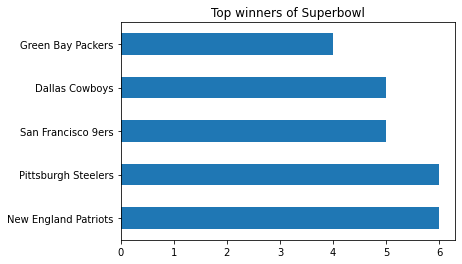

In [251]:
Top_Winners=df_sb_ws["Winning team"].value_counts().head(5)
Top_Winners
Top_Winners.plot(kind = 'barh', title = 'Top winners of Superbowl')

<AxesSubplot:title={'center':'Top finalists of Superbowl'}>

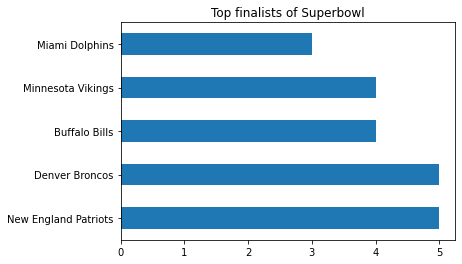

In [252]:
Top_Finalists=df_sb_ws["Losing team"].value_counts().head(5)
Top_Finalists
Top_Finalists.plot(kind = 'barh', title = 'Top finalists of Superbowl')

<AxesSubplot:title={'center':'Top Referees of NFL'}>

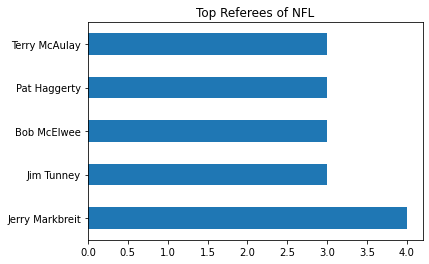

In [253]:
Top_Referees=df_sb_ws["Referee"].value_counts().head(5)
Top_Referees
Top_Referees.plot(kind = 'barh', title = 'Top Referees of NFL')

In [256]:
df_sb_ws['Attendance'].max()

'98374'

In [257]:
df_sb_ws[df_sb_ws['Attendance'] == '98374']

,Year,Winning team,Score,Losing team,Stadium,City,Attendance,Referee
26,1993,Dallas Cowboys,52–17,Buffalo Bills,Rose Bowl,Pasadena,98374,Dick Hantak


In [259]:
df_sb.to_csv('df_sb_api.csv')